# 1. Classifier algorithms

### Import libraries

In [12]:
import pandas as pd
import sys  
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE, SelectKBest, chi2
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from collections import Counter

### Load data

In [5]:
!{sys.executable} -m pip install --user matplotlib
dataFrame = pd.read_csv('./data/spam.dat')

### Data size

In [6]:
dataFrame.shape

(4789, 463)

In [7]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4789 entries, 0 to 4788
Columns: 463 entries, ACT_NOW to target
dtypes: int64(462), object(1)
memory usage: 16.9+ MB


### Data describe

In [8]:
dataFrame.describe()

,ACT_NOW,ADDRESSES_ON_CD,ADULT_SITE,ADVERT_CODE,ADVERT_CODE2,ALL_CAPS_HEADER,ALL_CAP_PORN,ALL_NATURAL,AMATEUR_PORN,AMAZING,...,X_AUTH_WARNING,X_ENC_PRESENT,X_LIBRARY,X_LIST_UNSUBSCRIBE,X_MSMAIL_PRIORITY_HIGH,X_PRECEDENCE_REF,X_PRIORITY_HIGH,X_STORMPOST_TO,X_X_PRESENT,YOUR_INCOME
count,4789.000000,4789.0,4789.000000,4789.000000,4789.000000,4789.000000,4789.000000,4789.000000,4789.000000,4789.000000,...,4789.000000,4789.000000,4789.000000,4789.000000,4789.000000,4789.000000,4789.000000,4789.000000,4789.000000,4789.000000
mean,0.008144,0.0,0.006056,0.000209,0.006682,0.000626,0.005638,0.007308,0.001879,0.002088,...,0.315097,0.001044,0.000626,0.012946,0.009397,0.000418,0.019420,0.000835,0.001253,0.000626
std,0.089883,0.0,0.077590,0.014450,0.081478,0.025023,0.074882,0.085185,0.043315,0.045653,...,0.464603,0.032298,0.025023,0.113055,0.096489,0.020434,0.138009,0.028892,0.035377,0.025023
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Is data balanced?

In [9]:
dataFrame['target'].value_counts()

no     2949
yes    1840
Name: target, dtype: int64

### Split data into train and test

In [10]:
X = dataFrame.drop(['target'], axis=1)
y = dataFrame.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=331, test_size=0.33)
print(f'Train rows={X_train.shape[0]}, test rows: {X_test.shape[0]}')

Train rows=3208, test rows: 1581


### Standarization

In [11]:
scaler = StandardScaler().fit(X_train)
X_train_standarized = scaler.transform(X_train) 
X_test_standarized = scaler.transform(X_test)

### SVM

In [59]:
svm = make_pipeline(StandardScaler(), SVC(gamma='auto'))
svm.fit(X_train_standarized, y_train)
y_prediction_svm = svm.predict(X_test_standarized)
svm_score = svm.score(X_test_standarized, y_test)
print(f'Score={svm_score}')

Score=0.9753320683111955


c:\users\arek\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


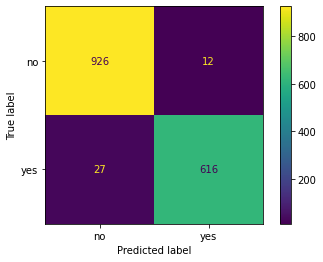

tp=616, fn=27, fp=12, tn=926
sensitivity=0.9580, specificity=0.9872
FPR=1.2793%, FNR=4.1991%


In [60]:
tn, fp, fn, tp = confusion_matrix(y_test, y_prediction_svm).ravel()
plot_confusion_matrix(svm, X_test_standarized, y_test)
plt.show()

print(f'tp={tp}, fn={fn}, fp={fp}, tn={tn}')
sensitivity = tp/(tp+fn)
specificity = tn/(fp+tn)
print("sensitivity={:.4f}, specificity={:.4f}".format(sensitivity, specificity))

fpr = (1-specificity)*100
fnr = (1-sensitivity)*100
print("FPR={:.4f}%, FNR={:.4f}%".format(fpr, fnr))

### kNN

In [61]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_standarized, y_train)
y_prediction_knn = knn.predict(X_test_standarized)
knn_score = knn.score(X_test_standarized, y_test)
print(f'Score={knn_score}')

Score=0.9272612270714737


c:\users\arek\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


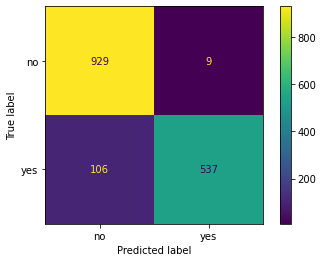

tp=537, fn=106, fp=9, tn=929
sensitivity=0.8351, specificity=0.9904
FPR=0.9595%, FNR=16.4852%


In [62]:
tn, fp, fn, tp = confusion_matrix(y_test, y_prediction_knn).ravel()
plot_confusion_matrix(knn, X_test_standarized, y_test)
plt.show()

print(f'tp={tp}, fn={fn}, fp={fp}, tn={tn}')
sensitivity = tp/(tp+fn)
specificity = tn/(fp+tn)
print("sensitivity={:.4f}, specificity={:.4f}".format(sensitivity, specificity))

fpr = (1-specificity)*100
fnr = (1-sensitivity)*100
print("FPR={:.4f}%, FNR={:.4f}%".format(fpr, fnr))

### Naive Bayes

In [63]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_prediction_gnb = gnb.predict(X_test)
gnb_score = gnb.score(X_test, y_test)
print(f'Score={gnb_score}')

Score=0.9728020240354206


c:\users\arek\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


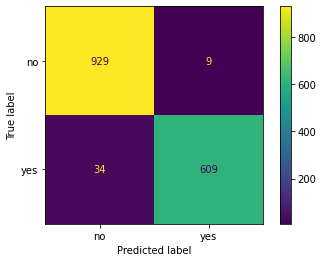

tp=609, fn=34, fp=9, tn=929
sensitivity=0.9471, specificity=0.9904
FPR=0.9595%, FNR=5.2877%


In [64]:
tn, fp, fn, tp = confusion_matrix(y_test, y_prediction_gnb).ravel()
plot_confusion_matrix(gnb, X_test, y_test)
plt.show()

print(f'tp={tp}, fn={fn}, fp={fp}, tn={tn}')
sensitivity = tp/(tp+fn)
specificity = tn/(fp+tn)
print("sensitivity={:.4f}, specificity={:.4f}".format(sensitivity, specificity))

fpr = (1-specificity)*100
fnr = (1-sensitivity)*100
print("FPR={:.4f}%, FNR={:.4f}%".format(fpr, fnr))

### MLP

In [38]:
mlp = MLPClassifier(random_state=1, max_iter=300, solver='adam')
mlp.fit(X_train_standarized, y_train)
y_prediction_mlp = mlp.predict(X_test_standarized)
mlp_score = mlp.score(X_test_standarized, y_test)
print(f'Score={mlp_score}')

Score=0.9848197343453511


c:\users\arek\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


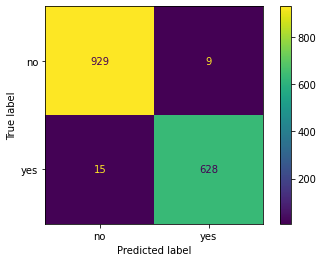

tp=628, fn=15, fp=9, tn=929
sensitivity=97.6672%, specificity=99.0405%
FPR=0.9595%, FNR=2.3328%


In [39]:
tn, fp, fn, tp = confusion_matrix(y_test, y_prediction_mlp).ravel()
plot_confusion_matrix(mlp, X_test_standarized, y_test)
plt.show()

print(f'tp={tp}, fn={fn}, fp={fp}, tn={tn}')
sensitivity_mlp = round(100*tp/(tp+fn), 4)
specificity_mlp = round(100*tn/(fp+tn), 4)
print("sensitivity={}%, specificity={}%".format(sensitivity_mlp, specificity_mlp))

fpr_mlp = round(100-specificity_mlp, 4)
fnr_mlp = round(100-sensitivity_mlp, 4)
print("FPR={}%, FNR={}%".format(fpr_mlp, fnr_mlp))

### Decision tree

In [33]:
decisionTree = DecisionTreeClassifier()
decisionTree.fit(X_train_standarized, y_train)
y_prediction_decision_tree = decisionTree.predict(X_test_standarized)
decision_tree_score = decisionTree.score(X_test_standarized, y_test)
print(f'Score={decision_tree_score}')

Score=0.9772296015180265


c:\users\arek\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


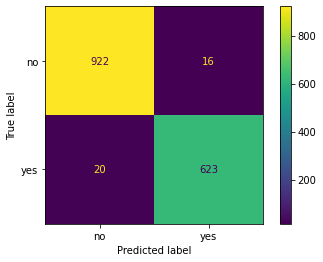

tp=623, fn=20, fp=16, tn=922
sensitivity=96.8896%, specificity=98.2942%
FPR=1.7058%, FNR=3.1104%


In [34]:
tn, fp, fn, tp = confusion_matrix(y_test, y_prediction_decision_tree).ravel()
plot_confusion_matrix(decisionTree, X_test_standarized, y_test)
plt.show()

print(f'tp={tp}, fn={fn}, fp={fp}, tn={tn}')
sensitivity_dt = round(100*tp/(tp+fn), 4)
specificity_dt = round(100*tn/(fp+tn), 4)
print("sensitivity={:.4f}%, specificity={:.4f}%".format(sensitivity_dt, specificity_dt))

fpr_dt = round(100-specificity_dt, 4)
fnr_dt = round(100-sensitivity_dt, 4)
print("FPR={:.4f}%, FNR={:.4f}%".format(fpr_dt, fnr_dt))

### Random Forest

In [69]:
rfc = RandomForestClassifier(max_depth=8, random_state=0)
rfc.fit(X_train_standarized, y_train)
y_prediction_rfc = rfc.predict(X_test_standarized)
rfc_score = rfc.score(X_test_standarized, y_test)
print(f'Score={rfc_score}')

Score=0.9639468690702088


c:\users\arek\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


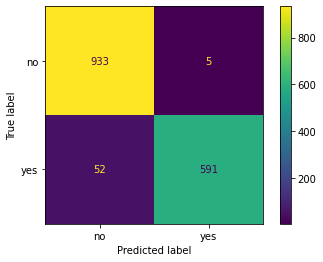

tp=591, fn=52, fp=5, tn=933
sensitivity=0.9191, specificity=0.9947
FPR=0.5330%, FNR=8.0871%


In [70]:
tn, fp, fn, tp = confusion_matrix(y_test, y_prediction_rfc).ravel()
plot_confusion_matrix(rfc, X_test_standarized, y_test)
plt.show()

print(f'tp={tp}, fn={fn}, fp={fp}, tn={tn}')
sensitivity = tp/(tp+fn)
specificity = tn/(fp+tn)
print("sensitivity={:.4f}, specificity={:.4f}".format(sensitivity, specificity))

fpr = (1-specificity)*100
fnr = (1-sensitivity)*100
print("FPR={:.4f}%, FNR={:.4f}%".format(fpr, fnr))

### Logistic Regression

In [71]:
lr = LogisticRegression(random_state=0)
lr.fit(X_train_standarized, y_train)
y_prediction_lr = lr.predict(X_test_standarized)
lr_score = lr.score(X_test_standarized, y_test)
print(f'Score={lr_score}')

Score=0.9765970904490828


c:\users\arek\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


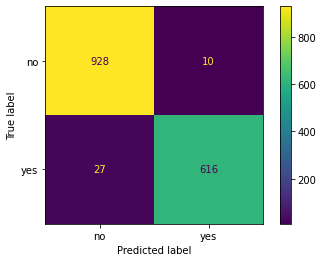

tp=616, fn=27, fp=10, tn=928
sensitivity=0.9580, specificity=0.9893
FPR=1.0661%, FNR=4.1991%


In [72]:
tn, fp, fn, tp = confusion_matrix(y_test, y_prediction_lr).ravel()
plot_confusion_matrix(lr, X_test_standarized, y_test)
plt.show()

print(f'tp={tp}, fn={fn}, fp={fp}, tn={tn}')
sensitivity = tp/(tp+fn)
specificity = tn/(fp+tn)
print("sensitivity={:.4f}, specificity={:.4f}".format(sensitivity, specificity))

fpr = (1-specificity)*100
fnr = (1-sensitivity)*100
print("FPR={:.4f}%, FNR={:.4f}%".format(fpr, fnr))

# 2. Classifier parameters

### 2.1 MLP

By default MLP has solver 'adam'. 
The solver for weight optimization.
* ‘lbfgs’ is an optimizer in the family of quasi-Newton methods.
* ‘sgd’ refers to stochastic gradient descent.
* ‘adam’ refers to a stochastic gradient-based optimizer proposed by Kingma, Diederik, and Jimmy Ba

Note: The default solver ‘adam’ works pretty well on relatively large datasets (with thousands of training samples or more) in terms of both training time and validation score. For small datasets, however, ‘lbfgs’ can converge faster and perform better.
(source: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)

In [44]:
# solver lbfgs
mlp_lbfgs = MLPClassifier(random_state=1, max_iter=300, solver='lbfgs')
mlp_lbfgs.fit(X_train_standarized, y_train)
y_prediction_mlp_lbfgs = mlp_lbfgs.predict(X_test_standarized)
mlp_lbfgs_score = mlp_lbfgs.score(X_test_standarized, y_test)
mlp_score_diff = mlp_lbfgs_score-mlp_score
print(f'Score with lbfgs solver={mlp_lbfgs_score} ({mlp_score_diff:+})')

tn, fp, fn, tp = confusion_matrix(y_test, y_prediction_mlp_lbfgs).ravel()
print(f'tp={tp}, fn={fn}, fp={fp}, tn={tn}')
sensitivity_mlp_lbfgs = round(100*tp/(tp+fn), 4)
specificity_mlp_lbfgs = round(100*tn/(fp+tn), 4)
sensitivity_mlp_diff = round(sensitivity_mlp_lbfgs - sensitivity_mlp, 4)
specificity_mlp_diff = round(specificity_mlp_lbfgs - specificity_mlp, 4)
print("sensitivity={}% ({:+}%), specificity={}% ({:+}%)".format(sensitivity_mlp_lbfgs, sensitivity_mlp_diff, specificity_mlp_lbfgs, specificity_mlp_diff))

fpr_mlp_lbfgs = round(100-specificity_mlp_lbfgs, 4)
fnr_mlp_lbfgs = round(100-sensitivity_mlp_lbfgs, 4)
fpr_mlp_diff = round(fpr_mlp_lbfgs - fpr_mlp, 4)
fnr_mlp_diff = round(fnr_mlp_lbfgs - fnr_mlp, 4)
print("lbfgs solver: FPR={}% ({:+}%), FNR={}% ({:+}%)".format(fpr_mlp_lbfgs, fpr_mlp_diff, fnr_mlp_lbfgs, fnr_mlp_diff))


Score with lbfgs solver=0.978494623655914 (-0.006325110689437086)
tp=625, fn=18, fp=16, tn=922
sensitivity=97.2006% (-0.4666%), specificity=98.2942% (-0.7463%)
lbfgs solver: FPR=1.7058% (+0.7463%), FNR=2.7994% (+0.4666%)


In [46]:
# sgd
mlp_sgd = MLPClassifier(random_state=1, max_iter=300, solver='sgd')
mlp_sgd.fit(X_train_standarized, y_train)
y_prediction_mlp_sgd = mlp_sgd.predict(X_test_standarized)
mlp_sgd_score = mlp_sgd.score(X_test_standarized, y_test)
mlp_score_diff = mlp_sgd_score-mlp_score
print(f'Score with sgd solver={mlp_sgd_score} ({mlp_score_diff:+})')

tn, fp, fn, tp = confusion_matrix(y_test, y_prediction_mlp_sgd).ravel()
print(f'tp={tp}, fn={fn}, fp={fp}, tn={tn}')
sensitivity_mlp_sgd = round(100*tp/(tp+fn), 4)
specificity_mlp_sgd= round(100*tn/(fp+tn), 4)
sensitivity_mlp_diff = round(sensitivity_mlp_sgd - sensitivity_mlp, 4)
specificity_mlp_diff = round(specificity_mlp_sgd - specificity_mlp, 4)
print("sensitivity={}% ({:+}%), specificity={}% ({:+}%)".format(sensitivity_mlp_sgd, sensitivity_mlp_diff, specificity_mlp_sgd, specificity_mlp_diff))

fpr_mlp_sgd = round(100-specificity_mlp_sgd, 4)
fnr_mlp_sgd = round(100-sensitivity_mlp_sgd, 4)
fpr_mlp_diff = round(fpr_mlp_sgd - fpr_mlp, 4)
fnr_mlp_diff = round(fnr_mlp_sgd - fnr_mlp, 4)
print("sgd solver: FPR={}% ({:+}%), FNR={}% ({:+}%)".format(fpr_mlp_sgd, fpr_mlp_diff, fnr_mlp_sgd, fnr_mlp_diff))

Score with sgd solver=0.9791271347248577 (-0.005692599620493399)
tp=619, fn=24, fp=9, tn=929
sensitivity=96.2675% (-1.3997%), specificity=99.0405% (+0.0%)
sgd solver: FPR=0.9595% (+0.0%), FNR=3.7325% (+1.3997%)


### Hidden layers and number of neurons
By default there is 1 hidden layer with 100 neurons. In hidden_layer_neuron_numbers there are number of neurons in hidden layer.

In [75]:
# 1 hidden layer
hidden_layer_neuron_numbers = [8, 16, 32, 40, 50, 64, 100, 128, 256]
for i in range(len(hidden_layer_neuron_numbers)):
    print('*'*20)
    print(f'Number of neurons in hidden layer = {hidden_layer_neuron_numbers[i]}')
    mlp_hidden_layer_test = MLPClassifier(random_state=1, max_iter=4000, hidden_layer_sizes=(hidden_layer_neuron_numbers[i]), solver='sgd')
    mlp_hidden_layer_test.fit(X_train_standarized, y_train)
    y_prediction_mlp_hidden_layer_test = mlp_hidden_layer_test.predict(X_test_standarized)
    mlp_hidden_layer_test_score = mlp_hidden_layer_test.score(X_test_standarized, y_test)
    score_sign = '+'
    if(mlp_score > mlp_hidden_layer_test_score):
        score_sign = '-'
    print(f'Score={mlp_hidden_layer_test_score}, score with default={mlp_score} ({score_sign}{abs(mlp_hidden_layer_test_score - mlp_score)})')

    tn, fp, fn, tp = confusion_matrix(y_test, y_prediction_mlp_hidden_layer_test).ravel()
    print(f'tp={tp}, fn={fn}, fp={fp}, tn={tn}')
    sensitivity_mlp_hidden_layer_test = tp/(tp+fn)
    specificity_mlp_hidden_layer_test = tn/(fp+tn)
    sensitivity_sign = '+'
    if(sensitivity_mlp > sensitivity_mlp_hidden_layer_test):
        sensitivity_sign = '-'

    specificity_sign = '+'
    if(specificity_mlp > specificity_mlp_hidden_layer_test):
        specificity_sign = '-'

    print(f'sensitivity={sensitivity_mlp_hidden_layer_test} ({sensitivity_sign}{abs(sensitivity_mlp_hidden_layer_test-sensitivity_mlp)}), specificity={specificity_mlp_hidden_layer_test} ({specificity_sign}{abs(specificity_mlp_hidden_layer_test-specificity_mlp)})')
    
    fpr_mlp_hidden_layer_test = (1-specificity_mlp_hidden_layer_test)*100
    fpr_sign = '+'
    if(fpr_mlp > fpr_mlp_hidden_layer_test):
        fpr_sign = '-'

    fnr_mlp_hidden_layer_test  = (1-sensitivity_mlp_hidden_layer_test)*100
    fnr_sign='+'
    if(fnr_mlp > fnr_mlp_hidden_layer_test):
        fnr_sign = '-'

    fpr_format = '{:.4f}'.format(fpr_mlp_hidden_layer_test)
    fnr_format = '{:.4f}'.format(fnr_mlp_hidden_layer_test)
    fpr_diff_format = '{:.4f}'.format(abs(fpr_mlp_hidden_layer_test-fpr_mlp))
    fnr_diff_format='{:.4f}'.format(abs(fnr_mlp_hidden_layer_test-fnr_mlp))
    print(f'FPR={fpr_format}% ({fpr_sign}{fpr_diff_format}%), FNR={fnr_format}% ({fnr_sign}{fnr_diff_format}%)')
    print(' '*20)


********************
Number of neurons in hidden layer = 8
Score=0.9778621125869703, score with default=0.9835547122074636 (-0.005692599620493288)
tp=616, fn=27, fp=8, tn=930
sensitivity=0.9580093312597201 (-0.01710730948678063), specificity=0.9914712153518124 (+0.002132196162046962)
FPR=0.8529% (-0.2132%), FNR=4.1991% (+1.7107%)
                    
********************
Number of neurons in hidden layer = 16
Score=0.9797596457938014, score with default=0.9835547122074636 (-0.003795066413662229)
tp=618, fn=25, fp=7, tn=931
sensitivity=0.9611197511664075 (-0.013996889580093264), specificity=0.9925373134328358 (+0.0031982942430703876)
FPR=0.7463% (-0.3198%), FNR=3.8880% (+1.3997%)
                    
********************
Number of neurons in hidden layer = 32
Score=0.9772296015180265, score with default=0.9835547122074636 (-0.006325110689437086)
tp=615, fn=28, fp=8, tn=930
sensitivity=0.9564541213063764 (-0.018662519440124314), specificity=0.9914712153518124 (+0.002132196162046962)
FPR=

Learning_rate schedule for weight updates. (By default 'constant', only used when solver is 'sgd')
* ‘constant’ is a constant learning rate given by ‘learning_rate_init’.

* ‘invscaling’ gradually decreases the learning rate at each time step ‘t’ using an inverse scaling exponent of ‘power_t’. effective_learning_rate = learning_rate_init / pow(t, power_t)

* ‘adaptive’ keeps the learning rate constant to ‘learning_rate_init’ as long as training loss keeps decreasing. Each time two consecutive epochs fail to decrease training loss by at least tol, or fail to increase validation score by at least tol if ‘early_stopping’ is on, the current learning rate is divided by 5.


In [76]:
# learning_rate='invscaling'
for i in range(len(hidden_layer_neuron_numbers)):
    print('*'*20)
    print(f'Number of neurons in hidden layer = {hidden_layer_neuron_numbers[i]}')
    mlp_hidden_layer_test = MLPClassifier(random_state=1, max_iter=4000, hidden_layer_sizes=(hidden_layer_neuron_numbers[i]), solver='sgd', learning_rate='invscaling')
    mlp_hidden_layer_test.fit(X_train_standarized, y_train)
    y_prediction_mlp_hidden_layer_test = mlp_hidden_layer_test.predict(X_test_standarized)
    mlp_hidden_layer_test_score = mlp_hidden_layer_test.score(X_test_standarized, y_test)
    score_sign = '+'
    if(mlp_score > mlp_hidden_layer_test_score):
        score_sign = '-'
    print(f'Score={mlp_hidden_layer_test_score}, score with default={mlp_score} ({score_sign}{abs(mlp_hidden_layer_test_score - mlp_score)})')

    tn, fp, fn, tp = confusion_matrix(y_test, y_prediction_mlp_hidden_layer_test).ravel()
    print(f'tp={tp}, fn={fn}, fp={fp}, tn={tn}')
    sensitivity_mlp_hidden_layer_test = tp/(tp+fn)
    specificity_mlp_hidden_layer_test = tn/(fp+tn)
    sensitivity_sign = '+'
    if(sensitivity_mlp > sensitivity_mlp_hidden_layer_test):
        sensitivity_sign = '-'

    specificity_sign = '+'
    if(specificity_mlp > specificity_mlp_hidden_layer_test):
        specificity_sign = '-'

    print(f'sensitivity={sensitivity_mlp_hidden_layer_test} ({sensitivity_sign}{abs(sensitivity_mlp_hidden_layer_test-sensitivity_mlp)}), specificity={specificity_mlp_hidden_layer_test} ({specificity_sign}{abs(specificity_mlp_hidden_layer_test-specificity_mlp)})')
    
    fpr_mlp_hidden_layer_test = (1-specificity_mlp_hidden_layer_test)*100
    fpr_sign = '+'
    if(fpr_mlp > fpr_mlp_hidden_layer_test):
        fpr_sign = '-'

    fnr_mlp_hidden_layer_test  = (1-sensitivity_mlp_hidden_layer_test)*100
    fnr_sign='+'
    if(fnr_mlp > fnr_mlp_hidden_layer_test):
        fnr_sign = '-'

    fpr_format = '{:.4f}'.format(fpr_mlp_hidden_layer_test)
    fnr_format = '{:.4f}'.format(fnr_mlp_hidden_layer_test)
    fpr_diff_format = '{:.4f}'.format(abs(fpr_mlp_hidden_layer_test-fpr_mlp))
    fnr_diff_format='{:.4f}'.format(abs(fnr_mlp_hidden_layer_test-fnr_mlp))
    print(f'FPR={fpr_format}% ({fpr_sign}{fpr_diff_format}%), FNR={fnr_format}% ({fnr_sign}{fnr_diff_format}%)')
    print(' '*20)

********************
Number of neurons in hidden layer = 8
Score=0.7330803289057558, score with default=0.9835547122074636 (-0.2504743833017078)
tp=242, fn=401, fp=21, tn=917
sensitivity=0.37636080870917576 (-0.598755832037325), specificity=0.9776119402985075 (-0.011727078891257903)
FPR=2.2388% (+1.1727%), FNR=62.3639% (+59.8756%)
                    
********************
Number of neurons in hidden layer = 16
Score=0.5850727387729285, score with default=0.9835547122074636 (-0.39848197343453506)
tp=448, fn=195, fp=461, tn=477
sensitivity=0.6967340590979783 (-0.2783825816485225), specificity=0.5085287846481876 (-0.4808102345415778)
FPR=49.1471% (+48.0810%), FNR=30.3266% (+27.8383%)
                    
********************
Number of neurons in hidden layer = 32
Score=0.7906388361796332, score with default=0.9835547122074636 (-0.19291587602783045)
tp=333, fn=310, fp=21, tn=917
sensitivity=0.5178849144634525 (-0.4572317262830482), specificity=0.9776119402985075 (-0.011727078891257903)
FPR

In [77]:
# learning_rate='adaptive'
for i in range(len(hidden_layer_neuron_numbers)):
    print('*'*20)
    print(f'Number of neurons in hidden layer = {hidden_layer_neuron_numbers[i]}')
    mlp_hidden_layer_test = MLPClassifier(random_state=1, max_iter=4000, hidden_layer_sizes=(hidden_layer_neuron_numbers[i]), solver='sgd', learning_rate='adaptive')
    mlp_hidden_layer_test.fit(X_train_standarized, y_train)
    y_prediction_mlp_hidden_layer_test = mlp_hidden_layer_test.predict(X_test_standarized)
    mlp_hidden_layer_test_score = mlp_hidden_layer_test.score(X_test_standarized, y_test)
    score_sign = '+'
    if(mlp_score > mlp_hidden_layer_test_score):
        score_sign = '-'
    print(f'Score={mlp_hidden_layer_test_score}, score with default={mlp_score} ({score_sign}{abs(mlp_hidden_layer_test_score - mlp_score)})')

    tn, fp, fn, tp = confusion_matrix(y_test, y_prediction_mlp_hidden_layer_test).ravel()
    print(f'tp={tp}, fn={fn}, fp={fp}, tn={tn}')
    sensitivity_mlp_hidden_layer_test = tp/(tp+fn)
    specificity_mlp_hidden_layer_test = tn/(fp+tn)
    sensitivity_sign = '+'
    if(sensitivity_mlp > sensitivity_mlp_hidden_layer_test):
        sensitivity_sign = '-'

    specificity_sign = '+'
    if(specificity_mlp > specificity_mlp_hidden_layer_test):
        specificity_sign = '-'

    print(f'sensitivity={sensitivity_mlp_hidden_layer_test} ({sensitivity_sign}{abs(sensitivity_mlp_hidden_layer_test-sensitivity_mlp)}), specificity={specificity_mlp_hidden_layer_test} ({specificity_sign}{abs(specificity_mlp_hidden_layer_test-specificity_mlp)})')
    
    fpr_mlp_hidden_layer_test = (1-specificity_mlp_hidden_layer_test)*100
    fpr_sign = '+'
    if(fpr_mlp > fpr_mlp_hidden_layer_test):
        fpr_sign = '-'

    fnr_mlp_hidden_layer_test  = (1-sensitivity_mlp_hidden_layer_test)*100
    fnr_sign='+'
    if(fnr_mlp > fnr_mlp_hidden_layer_test):
        fnr_sign = '-'

    fpr_format = '{:.4f}'.format(fpr_mlp_hidden_layer_test)
    fnr_format = '{:.4f}'.format(fnr_mlp_hidden_layer_test)
    fpr_diff_format = '{:.4f}'.format(abs(fpr_mlp_hidden_layer_test-fpr_mlp))
    fnr_diff_format='{:.4f}'.format(abs(fnr_mlp_hidden_layer_test-fnr_mlp))
    print(f'FPR={fpr_format}% ({fpr_sign}{fpr_diff_format}%), FNR={fnr_format}% ({fnr_sign}{fnr_diff_format}%)')
    print(' '*20)

********************
Number of neurons in hidden layer = 8
Score=0.9778621125869703, score with default=0.9835547122074636 (-0.005692599620493288)
tp=616, fn=27, fp=8, tn=930
sensitivity=0.9580093312597201 (-0.01710730948678063), specificity=0.9914712153518124 (+0.002132196162046962)
FPR=0.8529% (-0.2132%), FNR=4.1991% (+1.7107%)
                    
********************
Number of neurons in hidden layer = 16
Score=0.9797596457938014, score with default=0.9835547122074636 (-0.003795066413662229)
tp=618, fn=25, fp=7, tn=931
sensitivity=0.9611197511664075 (-0.013996889580093264), specificity=0.9925373134328358 (+0.0031982942430703876)
FPR=0.7463% (-0.3198%), FNR=3.8880% (+1.3997%)
                    
********************
Number of neurons in hidden layer = 32
Score=0.9765970904490828, score with default=0.9835547122074636 (-0.006957621758380772)
tp=615, fn=28, fp=9, tn=929
sensitivity=0.9564541213063764 (-0.018662519440124314), specificity=0.990405117270789 (+0.0010660980810235365)
FPR=

2 layers in hidden layer with sgd solver

In [78]:
# hidden layers
# learning_rate = 'adaptive'
hidden_layers_neuron_numbers = [(16, 16), (16, 32), (100, 128), (128, 256)]
for i in range(len(hidden_layers_neuron_numbers)):
    print('*'*20)
    print(f'Number of neurons in hidden layer = {hidden_layers_neuron_numbers[i]}')
    mlp_hidden_layer_test = MLPClassifier(random_state=1, max_iter=4000, hidden_layer_sizes=(hidden_layers_neuron_numbers[i]), solver='sgd', learning_rate='adaptive')
    mlp_hidden_layer_test.fit(X_train_standarized, y_train)
    y_prediction_mlp_hidden_layer_test = mlp_hidden_layer_test.predict(X_test_standarized)
    mlp_hidden_layer_test_score = mlp_hidden_layer_test.score(X_test_standarized, y_test)
    score_sign = '+'
    if(mlp_score > mlp_hidden_layer_test_score):
        score_sign = '-'
    print(f'Score={mlp_hidden_layer_test_score}, score with default={mlp_score} ({score_sign}{abs(mlp_hidden_layer_test_score - mlp_score)})')

    tn, fp, fn, tp = confusion_matrix(y_test, y_prediction_mlp_hidden_layer_test).ravel()
    print(f'tp={tp}, fn={fn}, fp={fp}, tn={tn}')
    sensitivity_mlp_hidden_layer_test = tp/(tp+fn)
    specificity_mlp_hidden_layer_test = tn/(fp+tn)
    sensitivity_sign = '+'
    if(sensitivity_mlp > sensitivity_mlp_hidden_layer_test):
        sensitivity_sign = '-'

    specificity_sign = '+'
    if(specificity_mlp > specificity_mlp_hidden_layer_test):
        specificity_sign = '-'

    print(f'sensitivity={sensitivity_mlp_hidden_layer_test} ({sensitivity_sign}{abs(sensitivity_mlp_hidden_layer_test-sensitivity_mlp)}), specificity={specificity_mlp_hidden_layer_test} ({specificity_sign}{abs(specificity_mlp_hidden_layer_test-specificity_mlp)})')
    
    fpr_mlp_hidden_layer_test = (1-specificity_mlp_hidden_layer_test)*100
    fpr_sign = '+'
    if(fpr_mlp > fpr_mlp_hidden_layer_test):
        fpr_sign = '-'

    fnr_mlp_hidden_layer_test  = (1-sensitivity_mlp_hidden_layer_test)*100
    fnr_sign='+'
    if(fnr_mlp > fnr_mlp_hidden_layer_test):
        fnr_sign = '-'

    fpr_format = '{:.4f}'.format(fpr_mlp_hidden_layer_test)
    fnr_format = '{:.4f}'.format(fnr_mlp_hidden_layer_test)
    fpr_diff_format = '{:.4f}'.format(abs(fpr_mlp_hidden_layer_test-fpr_mlp))
    fnr_diff_format='{:.4f}'.format(abs(fnr_mlp_hidden_layer_test-fnr_mlp))
    print(f'FPR={fpr_format}% ({fpr_sign}{fpr_diff_format}%), FNR={fnr_format}% ({fnr_sign}{fnr_diff_format}%)')
    print(' '*20)

********************
Number of neurons in hidden layer = (16, 16)
Score=0.9797596457938014, score with default=0.9835547122074636 (-0.003795066413662229)
tp=619, fn=24, fp=8, tn=930
sensitivity=0.9626749611197511 (-0.01244167962674958), specificity=0.9914712153518124 (+0.002132196162046962)
FPR=0.8529% (-0.2132%), FNR=3.7325% (+1.2442%)
                    
********************
Number of neurons in hidden layer = (16, 32)
Score=0.9772296015180265, score with default=0.9835547122074636 (-0.006325110689437086)
tp=615, fn=28, fp=8, tn=930
sensitivity=0.9564541213063764 (-0.018662519440124314), specificity=0.9914712153518124 (+0.002132196162046962)
FPR=0.8529% (-0.2132%), FNR=4.3546% (+1.8663%)
                    
********************
Number of neurons in hidden layer = (100, 128)
Score=0.978494623655914, score with default=0.9835547122074636 (-0.005060088551549602)
tp=619, fn=24, fp=10, tn=928
sensitivity=0.9626749611197511 (-0.01244167962674958), specificity=0.9893390191897654 (+0.0)
FP

### 2.2 Decision tree

# 3. Feature selection

### 3.1 RFE - Recursive feature elimination
Feature ranking with recursive feature elimination.

Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), the goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through any specific attribute or callable. Then, the least important features are pruned from current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

In [22]:
# data size
print(dataFrame.shape)

(4789, 463)


RFE with Decision tree

In [63]:
# take 200 most informative features
n_features_list = [50, 70, 100, 150, 200, 300, 400]

for n_features in n_features_list:
    print('*'*20)
    print(f'n_features={n_features}')
    
    # decision tree
    decisionTree_with_rfe = DecisionTreeClassifier()
    rfe = RFE(estimator=decisionTree_with_rfe, n_features_to_select=n_features, step=10)
    rfe = rfe.fit(X_train_standarized, y_train)
    y_prediction_rfe = rfe.predict(X_test_standarized)

    # compare score
    decisionTree_with_rfe_score = rfe.score(X_test_standarized, y_test)
    decisionTree_score_diff = decisionTree_with_rfe_score - decision_tree_score
    print(f'Score={decisionTree_with_rfe_score} ({decisionTree_score_diff:+})')

    # confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_test, y_prediction_rfe).ravel()
    print(f'tp={tp}, fn={fn}, fp={fp}, tn={tn}')
    sensitivity_dt_rfe = round(100*tp/(tp+fn), 4)
    specificity_dt_rfe = round(100*tn/(fp+tn), 4)
    sensitivity_dt_diff = round(sensitivity_dt_rfe - sensitivity_dt, 4)
    specificity_dt_diff = round(specificity_dt_rfe - specificity_dt, 4)
    print("sensitivity={}% ({:+}%), specificity={}% ({:+}%)".format(sensitivity_dt_rfe, sensitivity_dt_diff, specificity_dt_rfe, specificity_dt_diff))

    fpr_dt_rfe = round(100-specificity_dt_rfe, 4)
    fnr_dt_rfe = round(100-sensitivity_dt_rfe, 4)
    fpr_dt_diff = round(fpr_dt_rfe - fpr_dt, 4)
    fnr_dt_diff = round(fnr_dt_rfe - fnr_dt, 4)
    print("FPR={}% ({:+}%), FNR={}% ({:+}%)".format(fpr_dt_rfe, fpr_dt_diff, fnr_dt_rfe, fnr_dt_diff))
    print(' '*20)


********************
n_features=50
Score=0.9772296015180265 (+0.0006325110689436864)
tp=620, fn=23, fp=13, tn=925
sensitivity=96.423% (+0.0%), specificity=98.6141% (+0.1066%)
FPR=1.3859% (-0.1066%), FNR=3.577% (+0.0%)
                    
********************
n_features=70
Score=0.9759645793801391 (-0.0006325110689436864)
tp=622, fn=21, fp=17, tn=921
sensitivity=96.7341% (+0.3111%), specificity=98.1876% (-0.3199%)
FPR=1.8124% (+0.3199%), FNR=3.2659% (-0.3111%)
                    
********************
n_features=100
Score=0.9765970904490828 (+0.0)
tp=622, fn=21, fp=16, tn=922
sensitivity=96.7341% (+0.3111%), specificity=98.2942% (-0.2133%)
FPR=1.7058% (+0.2133%), FNR=3.2659% (-0.3111%)
                    
********************
n_features=150
Score=0.9746995572422518 (-0.001897533206831059)
tp=622, fn=21, fp=19, tn=919
sensitivity=96.7341% (+0.3111%), specificity=97.9744% (-0.5331%)
FPR=2.0256% (+0.5331%), FNR=3.2659% (-0.3111%)
                    
********************
n_features=200
S

### 3.2 Univariate feature selection - SelectKBest

In [38]:
bestFeaturesList = [50, 70, 100, 150, 200, 300, 400]

SelectKBest with MLP

In [42]:
for bestFeatures in bestFeaturesList:
    print('*'*20)
    print(f'Best features={bestFeatures}')
    selector = SelectKBest(chi2, k=bestFeatures)
    X_train_skb = selector.fit_transform(X_train, y_train) # fit only on train set!
    X_test_skb = selector.transform(X_test)

    # standarization
    scaler = StandardScaler().fit(X_train_skb) # fit only on train set!
    X_train_skb_std = scaler.transform(X_train_skb)
    X_test_skb_std = scaler.transform(X_test_skb)

    # mlp classifier
    mlp_skb = MLPClassifier(random_state=1, max_iter=300, solver='adam')
    mlp_skb.fit(X_train_skb_std, y_train)
    y_prediction_mlp_skb = mlp_skb.predict(X_test_skb_std)
    mlp_skb_score = mlp_skb.score(X_test_skb_std, y_test)

    # compare score with default
    mlp_skb_diff = mlp_skb_score - mlp_score
    print(f'Score={mlp_skb_score} ({mlp_skb_diff:+})')

    # confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_test, y_prediction_mlp_skb).ravel()
    print(f'tp={tp}, fn={fn}, fp={fp}, tn={tn}')
    sensitivity_mlp_skb = round(tp/(tp+fn), 4)
    specificity_mlp_skb = round(tn/(fp+tn), 4)
    
    # compare with default
    sensitivity_mlp_diff = round(sensitivity_mlp_skb-sensitivity_mlp, 4)
    specificity_mlp_diff = round(specificity_mlp_skb-specificity_mlp, 4)
    print("sensitivity={} ({:+}), specificity={} ({:+})".format(sensitivity_mlp_skb, sensitivity_mlp_diff, specificity_mlp_skb, specificity_mlp_diff))

    # fpr and fnr
    fpr_mlp_skb = round((1-specificity_mlp_skb)*100, 4)
    fnr_mlp_skb = round((1-sensitivity_mlp_skb)*100, 4)
    fpr_mlp_skb_diff = round(fpr_mlp_skb - fpr_mlp, 4)
    fnr_mlp_skb_diff = round(fnr_mlp_skb - fnr_mlp, 4)
    print("FPR={}% ({:+}%), FNR={}% ({:+}%)".format(fpr_mlp_skb, fpr_mlp_skb_diff, fnr_mlp_skb, fnr_mlp_skb_diff))
    print(' '*20)

********************
Best features=50
Score=0.9778621125869703 (-0.006957621758380772)
tp=620, fn=23, fp=12, tn=926
sensitivity=0.9642 (-0.0125), specificity=0.9872 (-0.0032)
FPR=1.28% (+0.32%), FNR=3.58% (+1.25%)
                    
********************
Best features=70
Score=0.9860847564832385 (+0.0012650221378873727)
tp=624, fn=19, fp=3, tn=935
sensitivity=0.9705 (-0.0062), specificity=0.9968 (+0.0064)
FPR=0.32% (-0.64%), FNR=2.95% (+0.62%)
                    
********************
Best features=100
Score=0.9816571790006325 (-0.003162555344718543)
tp=623, fn=20, fp=9, tn=929
sensitivity=0.9689 (-0.0078), specificity=0.9904 (+0.0)
FPR=0.96% (+0.0%), FNR=3.11% (+0.78%)
                    
********************
Best features=150
Score=0.9816571790006325 (-0.003162555344718543)
tp=622, fn=21, fp=8, tn=930
sensitivity=0.9673 (-0.0094), specificity=0.9915 (+0.0011)
FPR=0.85% (-0.11%), FNR=3.27% (+0.94%)
                    
********************
Best features=200
Score=0.9810246679316889 

Best results for selecting 70 features. FPR has been reduced to 0.32% (less than 0.5%), at the same time FNR was increased by 0.6172% making it to 2.95%. We accept more spam (sensitivity is lower = 97.05%) but we take more valid mails (specificity = 99.68%).

* Best features=70
* Score=0.9860847564832385 (+0.0013)
* tp=624, fn=19, fp=3, tn=935
* sensitivity=0.9705 (-0.0062), specificity=0.9968 (+0.0064)
* FPR=0.32% (-0.6395%), FNR=2.95% (+0.6172%)

SelectKBest with DecisionTree

In [61]:
print('SelectKBest with DecisionTree')
for bestFeatures in bestFeaturesList:
    print('*'*20)
    print(f'Best features={bestFeatures}')
    selector = SelectKBest(chi2, k=bestFeatures)
    X_train_skb = selector.fit_transform(X_train, y_train) # fit only on train set!
    X_test_skb = selector.transform(X_test)

    # standarization
    scaler = StandardScaler().fit(X_train_skb) # fit only on train set!
    X_train_skb_std = scaler.transform(X_train_skb)
    X_test_skb_std = scaler.transform(X_test_skb)

    # decision tree classifier
    dt_skb = DecisionTreeClassifier()
    dt_skb.fit(X_train_skb_std, y_train)
    y_prediction_dt_skb = dt_skb.predict(X_test_skb_std)
    dt_skb_score = dt_skb.score(X_test_skb_std, y_test)

    # compare score with default
    dt_skb_diff = dt_skb_score - decision_tree_score
    print(f'Score={dt_skb_score} ({dt_skb_diff:+})')

    # confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_test, y_prediction_dt_skb).ravel()
    print(f'tp={tp}, fn={fn}, fp={fp}, tn={tn}')
    sensitivity_dt_skb = round(100*tp/(tp+fn), 4)
    specificity_dt_skb = round(100*tn/(fp+tn), 4)
    
    # compare with default
    sensitivity_dt_diff = round(sensitivity_dt_skb-sensitivity_dt, 4)
    specificity_dt_diff = round(specificity_dt_skb-specificity_dt, 4)
    print("sensitivity={}% ({:+}%), specificity={}% ({:+}%)".format(sensitivity_dt_skb, sensitivity_dt_diff, specificity_dt_skb, specificity_dt_diff))

    # fpr and fnr
    fpr_dt_skb = round(100-specificity_dt_skb, 4)
    fnr_dt_skb = round(100-sensitivity_dt_skb, 4)
    fpr_dt_skb_diff = round(fpr_dt_skb - fpr_dt, 4)
    fnr_dt_skb_diff = round(fnr_dt_skb - fnr_dt, 4)
    print("FPR={}% ({:+}%), FNR={}% ({:+}%)".format(fpr_dt_skb, fpr_dt_skb_diff, fnr_dt_skb, fnr_dt_skb_diff))
    print(' '*20)

SelectKBest with DecisionTree
********************
Best features=50
Score=0.9721695129664769 (-0.0044275774826059155)
tp=608, fn=35, fp=9, tn=929
sensitivity=94.5568% (-1.8662%), specificity=99.0405% (+0.533%)
FPR=0.9595% (-0.533%), FNR=5.4432% (+1.8662%)
                    
********************
Best features=70
Score=0.9746995572422518 (-0.001897533206831059)
tp=608, fn=35, fp=5, tn=933
sensitivity=94.5568% (-1.8662%), specificity=99.467% (+0.9595%)
FPR=0.533% (-0.9595%), FNR=5.4432% (+1.8662%)
                    
********************
Best features=100
Score=0.9715370018975332 (-0.005060088551549602)
tp=608, fn=35, fp=10, tn=928
sensitivity=94.5568% (-1.8662%), specificity=98.9339% (+0.4264%)
FPR=1.0661% (-0.4264%), FNR=5.4432% (+1.8662%)
                    
********************
Best features=150
Score=0.9709044908285895 (-0.005692599620493288)
tp=609, fn=34, fp=12, tn=926
sensitivity=94.7123% (-1.7107%), specificity=98.7207% (+0.2132%)
FPR=1.2793% (-0.2132%), FNR=5.2877% (+1.7107%

### 3.3 PCA

Principal component analysis (PCA).

Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space. The input data is centered but not scaled for each feature before applying the SVD.

In [50]:
componentsList = [50, 70, 100, 150, 200, 300, 400]

PCA with MLP:

In [51]:
for components in componentsList:
    print('*'*20)
    print(f'Components={components}')
    pca = PCA(n_components=components).fit(X_train) # fit only on train set
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)

    # standarize
    scaler = StandardScaler().fit(X_train_pca)
    X_train_pca_std = scaler.transform(X_train_pca)
    X_test_pca_std = scaler.transform(X_test_pca)

    # mlp
    mlp_pca = MLPClassifier(random_state=1, max_iter=300, solver='adam')
    mlp_pca.fit(X_train_pca_std, y_train)
    y_prediction_mlp_pca = mlp_pca.predict(X_test_pca_std)
    mlp_pca_score = mlp_pca.score(X_test_pca_std, y_test)
    
    # compare with default
    mlp_pca_score_diff = mlp_pca_score - mlp_score
    print(f'Score={mlp_pca_score} ({mlp_pca_score_diff:+})')

    # confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_test, y_prediction_mlp_pca).ravel()
    print(f'tp={tp}, fn={fn}, fp={fp}, tn={tn}')
    sensitivity_mlp_pca = round(tp/(tp+fn), 4)
    specificity_mlp_pca = round(tn/(fp+tn), 4)
    sensitivity_mlp_diff = round(sensitivity_mlp_pca - sensitivity_mlp, 4)
    specificity_mlp_diff = round(specificity_mlp_pca - specificity_mlp, 4)
    print("sensitivity={} ({:+}), specificity={} ({:+})".format(sensitivity_mlp_pca, sensitivity_mlp_diff, specificity_mlp_pca, specificity_mlp_diff))

    # fpr and fnr
    fpr_mlp_pca = round((1-specificity_mlp_pca)*100, 4)
    fnr_mlp_pca = round((1-sensitivity_mlp_pca)*100, 4)
    fpr_mlp_diff = round(fpr_mlp_pca - fpr_mlp, 4)
    fnr_mlp_diff = round(fnr_mlp_pca - fnr_mlp, 4)
    print("FPR={}% ({:+}%), FNR={}% ({:+}%)".format(fpr_mlp_pca, fpr_mlp_diff, fnr_mlp_pca, fnr_mlp_diff))
    print(' '*20)

********************
Components=50
Score=0.9835547122074636 (-0.0012650221378874837)
tp=623, fn=20, fp=6, tn=932
sensitivity=0.9689 (-0.0078), specificity=0.9936 (+0.0032)
FPR=0.64% (-0.32%), FNR=3.11% (+0.78%)
                    
********************
Components=70
Score=0.9835547122074636 (-0.0012650221378874837)
tp=623, fn=20, fp=6, tn=932
sensitivity=0.9689 (-0.0078), specificity=0.9936 (+0.0032)
FPR=0.64% (-0.32%), FNR=3.11% (+0.78%)
                    
********************
Components=100
Score=0.9803921568627451 (-0.004427577482606027)
tp=620, fn=23, fp=8, tn=930
sensitivity=0.9642 (-0.0125), specificity=0.9915 (+0.0011)
FPR=0.85% (-0.11%), FNR=3.58% (+1.25%)
                    
********************
Components=150
Score=0.9778621125869703 (-0.006957621758380772)
tp=617, fn=26, fp=9, tn=929
sensitivity=0.9596 (-0.0171), specificity=0.9904 (+0.0)
FPR=0.96% (+0.0%), FNR=4.04% (+1.71%)
                    
********************
Components=200
Score=0.9829222011385199 (-0.00189753320

PCA with Decision tree

In [60]:
for components in componentsList:
    print('*'*20)
    print(f'Components={components}')
    pca = PCA(n_components=components).fit(X_train) # fit only on train set
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)

    # standarize
    scaler = StandardScaler().fit(X_train_pca)
    X_train_pca_std = scaler.transform(X_train_pca)
    X_test_pca_std = scaler.transform(X_test_pca)

    # decision tree classifier
    dt_pca = DecisionTreeClassifier()
    dt_pca.fit(X_train_pca_std, y_train)
    y_prediction_dt_pca = dt_pca.predict(X_test_pca_std)
    dt_pca_score = dt_pca.score(X_test_pca_std, y_test)
    
    # compare with default
    dt_pca_score_diff = dt_pca_score - decision_tree_score
    print(f'Score={dt_pca_score} ({dt_pca_score_diff:+})')

    # confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_test, y_prediction_dt_pca).ravel()
    print(f'tp={tp}, fn={fn}, fp={fp}, tn={tn}')
    sensitivity_dt_pca = round(100*tp/(tp+fn), 4)
    specificity_dt_pca = round(100*tn/(fp+tn), 4)
    sensitivity_dt_diff = round(sensitivity_dt_pca - sensitivity_dt, 4)
    specificity_dt_diff = round(specificity_dt_pca - specificity_dt, 4)
    print("sensitivity={}% ({:+}%), specificity={}% ({:+}%)".format(sensitivity_dt_pca, sensitivity_dt_diff, specificity_dt_pca, specificity_dt_diff))

    # fpr and fnr
    fpr_dt_pca = round(100-specificity_dt_pca, 4)
    fnr_dt_pca = round(100-sensitivity_dt_pca, 4)
    fpr_dt_diff = round(fpr_dt_pca - fpr_dt, 4)
    fnr_dt_diff = round(fnr_dt_pca - fnr_dt, 4)
    print("FPR={}% ({:+}%), FNR={}% ({:+}%)".format(fpr_dt_pca, fpr_dt_diff, fnr_dt_pca, fnr_dt_diff))
    print(' '*20)

********************
Components=50
Score=0.9645793801391525 (-0.012017710309930374)
tp=615, fn=28, fp=28, tn=910
sensitivity=95.6454% (-0.7776%), specificity=97.0149% (-1.4926%)
FPR=2.9851% (+1.4926%), FNR=4.3546% (+0.7776%)
                    
********************
Components=70
Score=0.9652118912080961 (-0.011385199240986688)
tp=617, fn=26, fp=29, tn=909
sensitivity=95.9565% (-0.4665%), specificity=96.9083% (-1.5992%)
FPR=3.0917% (+1.5992%), FNR=4.0435% (+0.4665%)
                    
********************
Components=100
Score=0.9601518026565465 (-0.01644528779253629)
tp=609, fn=34, fp=29, tn=909
sensitivity=94.7123% (-1.7107%), specificity=96.9083% (-1.5992%)
FPR=3.0917% (+1.5992%), FNR=5.2877% (+1.7107%)
                    
********************
Components=150
Score=0.9690069576217584 (-0.007590132827324458)
tp=609, fn=34, fp=15, tn=923
sensitivity=94.7123% (-1.7107%), specificity=98.4009% (-0.1066%)
FPR=1.5991% (+0.1066%), FNR=5.2877% (+1.7107%)
                    
***************

# 4. Methods for class-imbalanced problems

### 4.1 Oversampling with SMOTE

Class to perform over-sampling using SMOTE - Synthetic Minority over-sampling

In [14]:
print(f'Original train dataset shape: {Counter(y_train)}')

Original train dataset shape: Counter({'no': 2011, 'yes': 1197})


We see that originally train set contains more non spam data. SMOTE algorithm will add spam samples to train set.

In [17]:
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
print(f'Resampled train dataset shape: {Counter(y_train_res)}')

Resampled train dataset shape: Counter({'yes': 2011, 'no': 2011})


Now let's see how it affects sensitivity and specificity on MLP and DecisionTree classifiers

In [30]:
# standarization
scaler = StandardScaler().fit(X_train_res, y_train_res)
X_train_res_std = scaler.transform(X_train_res)
X_test_std = scaler.transform(X_test)

In [31]:
# mlp classifier
mlp_smote = MLPClassifier(random_state=1, max_iter=300, solver='adam')
mlp_smote.fit(X_train_res_std, y_train_res)
y_prediction_mlp_smote = mlp_smote.predict(X_test_std)
mlp_smote_score = mlp_smote.score(X_test_std, y_test)
mlp_score_diff = mlp_smote_score - mlp_score
print(f'Score={mlp_smote_score} ({mlp_score_diff:+})')

# confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_prediction_mlp_smote).ravel()
print(f'tp={tp}, fn={fn}, fp={fp}, tn={tn}')

sensitivity_mlp_smote = round(100*tp/(tp+fn), 4)
specificity_mlp_smote = round(100*tn/(fp+tn), 4)
sensitivity_mlp_diff = round(sensitivity_mlp_smote - sensitivity_mlp, 4)
specificity_mlp_diff = round(specificity_mlp_smote - specificity_mlp, 4)

print("sensitivity={}% ({:+}%), specificity={}% ({:+}%)".format(sensitivity_mlp_smote, sensitivity_mlp_diff, specificity_mlp_smote, specificity_mlp_diff))

fpr_mlp_smote = round(100-specificity_mlp_smote, 4)
fnr_mlp_smote = round(100-sensitivity_mlp_smote, 4)
fpr_mlp_diff = round(fpr_mlp_smote - fpr_mlp, 4)
fnr_mlp_diff = round(fnr_mlp_smote - fnr_mlp, 4)
print("FPR={}% ({:+}%), FNR={}% ({:+}%)".format(fpr_mlp, fpr_mlp_diff, fnr_mlp, fnr_mlp_diff))



Score=0.9740670461733081 (-0.010752688172043001)
tp=621, fn=22, fp=19, tn=919
sensitivity=96.5785% (-1.0887%), specificity=97.9744% (-1.0661%)
FPR=0.9595% (+1.0661%), FNR=2.3328% (+1.0887%)


In [47]:
# decision tree classifier
dt_smote = DecisionTreeClassifier()
dt_smote.fit(X_train_res_std, y_train_res)
y_prediction_dt_smote = dt_smote.predict(X_test_std)
dt_smote_score = dt_smote.score(X_test_std, y_test)
dt_score_diff = dt_smote_score - decision_tree_score
print(f'Score={dt_smote_score} ({dt_score_diff:+})')

# confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_prediction_dt_smote).ravel()
print(f'tp={tp}, fn={fn}, fp={fp}, tn={tn}')

sensitivity_dt_smote = round(100*tp/(tp+fn), 4)
specificity_dt_smote = round(100*tn/(fp+tn), 4)
sensitivity_dt_diff = round(sensitivity_dt_smote - sensitivity_dt, 4)
specificity_dt_diff = round(specificity_dt_smote - specificity_dt, 4)

print("sensitivity={}% ({:+}%), specificity={}% ({:+}%)".format(sensitivity_dt_smote, sensitivity_dt_diff, specificity_dt_smote, specificity_dt_diff))

fpr_dt_smote = round(100-specificity_dt_smote, 4)
fnr_dt_smote = round(100-sensitivity_dt_smote, 4)
fpr_dt_diff = round(fpr_dt_smote - fpr_dt, 4)
fnr_dt_diff = round(fnr_dt_smote - fnr_dt, 4)
print("FPR={}% ({:+}%), FNR={}% ({:+}%)".format(fpr_dt_smote, fpr_dt_diff, fnr_dt_smote, fnr_dt_diff))



Score=0.9601518026565465 (-0.017077798861479976)
tp=609, fn=34, fp=29, tn=909
sensitivity=94.7123% (-2.1773%), specificity=96.9083% (-1.3859%)
FPR=3.0917% (+1.3859%), FNR=5.2877% (+2.1773%)


# 5. The use of asymetric error costs

# 6. Ensamble learning